In [17]:
# Import the pySIFT code.
import sys
sys.path.append("pySift")
from pySift import sift, matching
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import time
from collections import Counter
import pylab as plt
from IPython import display
import pickle
from pandas.tools.plotting import scatter_matrix
import pandas as pd
import random
import itertools
from sys import getsizeof


from sklearn.neighbors import *
from sklearn.neighbors.nearest_centroid import NearestCentroid
from sklearn.neural_network import MLPClassifier
from sklearn.svm import *
from sklearn.decomposition import *

from sklearn.gaussian_process import *
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.ensemble import *

from sklearn.linear_model import SGDClassifier
from sklearn.cluster import *

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import *
from sklearn import preprocessing
from sklearn.metrics import *

In [102]:
cluster_amounts1 = [3,10,30,100,300,1000,2000,3000,4000,5000,6000]
cluster_amounts2 = [200,400,500,600,700,800,900,1100,1200,1300,1400,1500,1600,1700,1800,1900]
cluster_amounts = cluster_amounts1 + cluster_amounts2

paths = []
inertia = {}

for amount in cluster_amounts:
    inertia[amount] = []
    for subdir, dirs, files in os.walk('clusters/'+str(amount)):
        for f in files:
            paths.append(os.path.join(subdir, f))
len(paths)
inertia

{3: [],
 10: [],
 30: [],
 100: [],
 200: [],
 300: [],
 400: [],
 500: [],
 600: [],
 700: [],
 800: [],
 900: [],
 1000: [],
 1100: [],
 1200: [],
 1300: [],
 1400: [],
 1500: [],
 1600: [],
 1700: [],
 1800: [],
 1900: [],
 2000: [],
 3000: [],
 4000: [],
 5000: [],
 6000: []}

In [103]:
for path in paths:
    with open(path, "rb") as f:
        clusters = pickle.load(f)
    nr_clusters = clusters.n_clusters
    inertia[nr_clusters].append(clusters.inertia_)
    print nr_clusters, clusters.inertia_

3 688915.779155
3 688849.067904
3 691620.967103
3 703765.40669
3 690801.535376
3 690584.09291
3 689291.479429
3 689047.548503
3 689204.677384
3 697177.384136
10 599339.589722
10 618800.587926
10 606475.852079
10 601583.546418
10 599377.35431
10 600646.664199
10 594809.135544
10 597994.108801
10 596084.313365
10 598857.117847
30 513375.609521
30 514091.086004
30 514861.265617
30 513285.943109
30 518093.154426
30 514239.052984
30 513083.654717
30 513718.607436
30 515630.971261
30 515363.920707
100 444387.738759
100 443950.165578
100 443879.974743
100 444090.987501
100 443766.908951
100 447262.281466
100 446000.909751
100 443970.532817
100 445361.276159
100 444161.3823
300 399581.411952
300 400115.320447
300 399952.773389
300 399642.098846
300 398866.313943
300 399651.808911
300 399289.748976
300 399505.061275
300 400362.02148
300 399613.435993
1000 363311.45897
1000 363016.740026
1000 362826.434275
1000 363398.483419
1000 478145.188471
1000 363707.885952
1000 363025.5354
1000 363120.2658

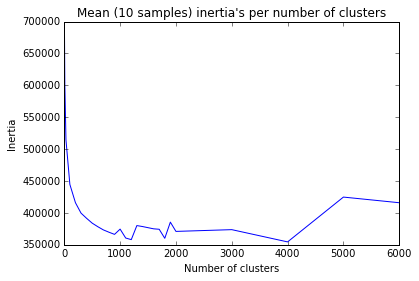

In [100]:
df = pd.DataFrame.from_dict(inertia)
df.mean().plot(title="Mean (10 samples) inertia's per number of clusters")
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.savefig('plots/mean_inertia.png')

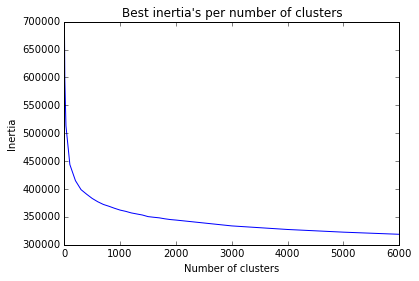

In [101]:
df.min().plot(title="Best inertia's per number of clusters")
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.savefig('plots/best_inertia.png')

In [87]:
df.idxmin()

3       1
10      6
30      6
100     4
200     6
300     4
400     4
500     7
600     7
700     8
800     3
900     8
1000    9
1100    1
1200    0
1300    8
1400    1
1500    1
1600    0
1700    6
1800    2
1900    3
2000    9
3000    1
4000    7
5000    3
6000    3
dtype: int64